# **Transformations - Translations and Rotations**

In image processing, translation refers to the process of shifting an image by a certain distance along the x and y axes. This operation is useful for tasks such as image alignment, registration, and object tracking. Mathematically, a translation can be represented by a 2x3 transformation matrix:

$T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$

where $( t_x )$ and $( t_y )$ are the translation distances along the x and y axes, respectively. To perform a translation on an image, each pixel in the original image is mapped to a new location according to the transformation matrix $( T )$.

Let $( (x, y) )$ be the coordinates of a pixel in the original image, and let $( (x', y') )$ be the coordinates of the corresponding pixel in the translated image. The relationship between the original and translated coordinates is given by:

$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$

$x' = x + t_x$
$y' = y + t_y$

This means that each pixel in the translated image is shifted by $( t_x )$ units along the x axis and $( t_y )$ units along the y axis relative to its original position in the image.

**Image Rotations:**

Rotation involves rotating an image by a certain angle around a specified point, typically the center of the image. Mathematically, rotation can be represented by a 2x3 transformation matrix:

$R = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \end{bmatrix}$

where $( \theta )$ is the rotation angle in radians. To perform a rotation on an image, each pixel in the original image is mapped to a new location according to the transformation matrix $( R )$.

Let $( (x, y) )$ be the coordinates of a pixel in the original image, and let $( (x', y') )$ be the coordinates of the corresponding pixel in the rotated image. The relationship between the original and rotated coordinates is given by:

$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$

$x' = x \cos(\theta) - y \sin(\theta)$
$y' = x \sin(\theta) + y \cos(\theta)$

This means that each pixel in the rotated image is mapped to a new position based on its original coordinates and the rotation angle $( \theta )$.

In both translations and rotations, the transformation matrices can be applied to every pixel in the image to generate the transformed image. These operations are fundamental in image processing and are used in various applications such as image registration, geometric transformations, and image augmentation.

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 7):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

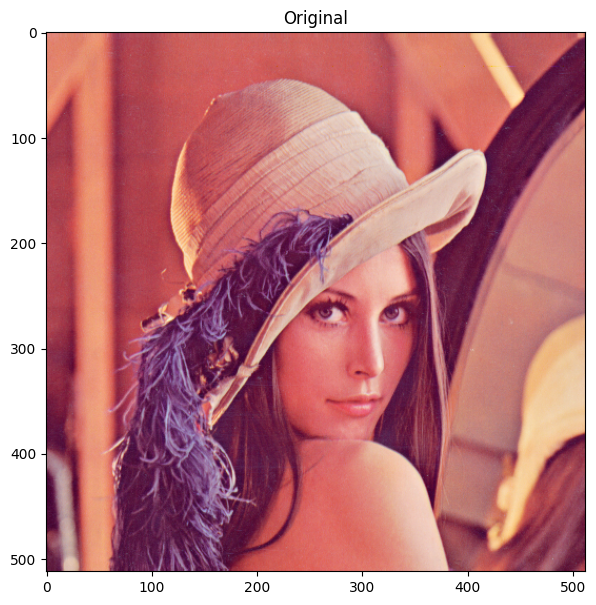

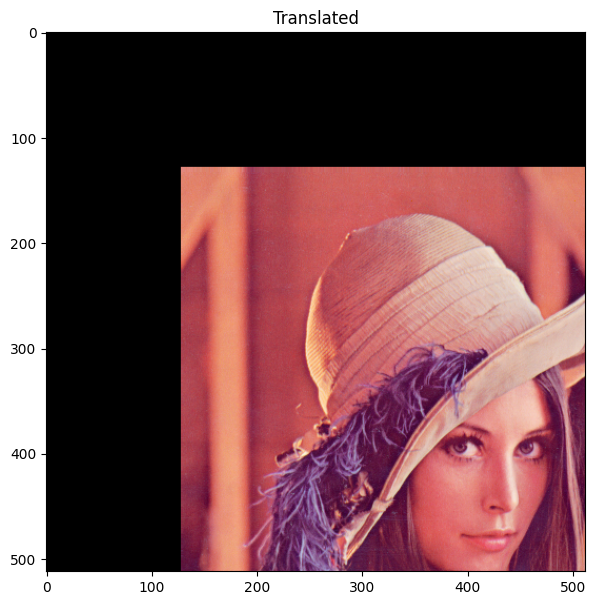

In [2]:
# Load our image
image = cv2.imread('./image/lena.png')
imshow("Original", image)

# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [3]:
# What does T look like
print(T)

print(height, width )

[[  1.   0. 128.]
 [  0.   1. 128.]]
512 512


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```


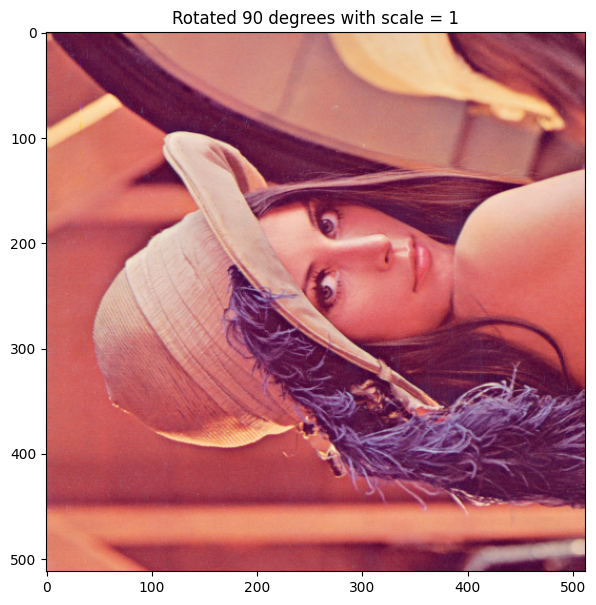

In [4]:
# Load our image
image = cv2.imread('./image/lena.png')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[  0.49497475   0.49497475   2.57292962]
 [ -0.49497475   0.49497475 256.        ]]


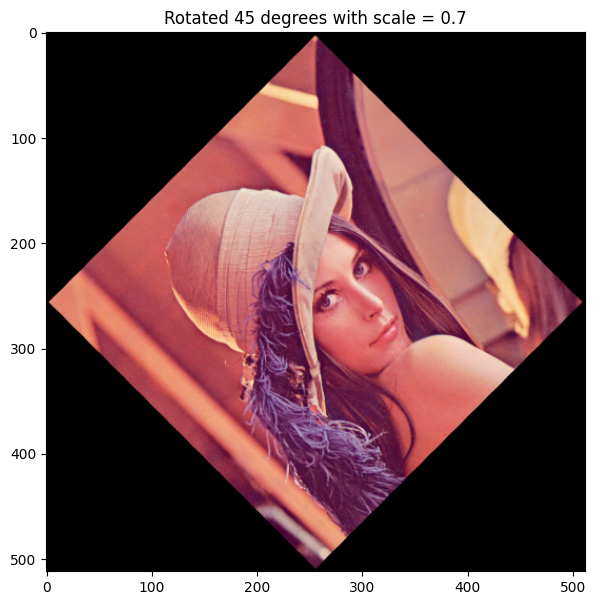

In [7]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 0.7)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 45 degrees with scale = 0.7", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




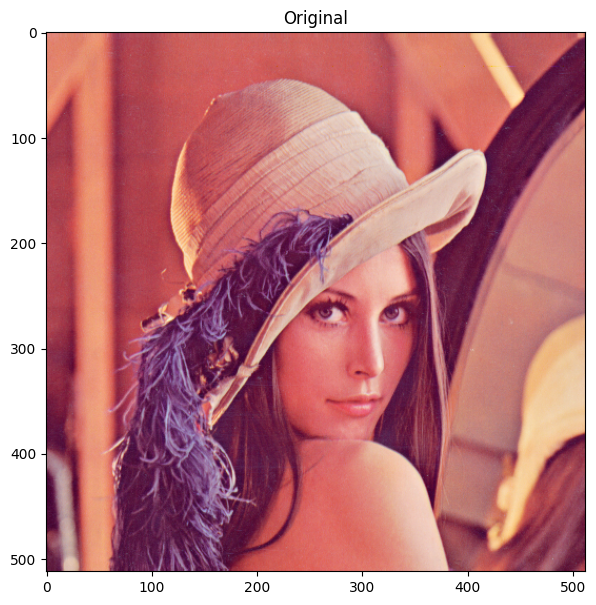

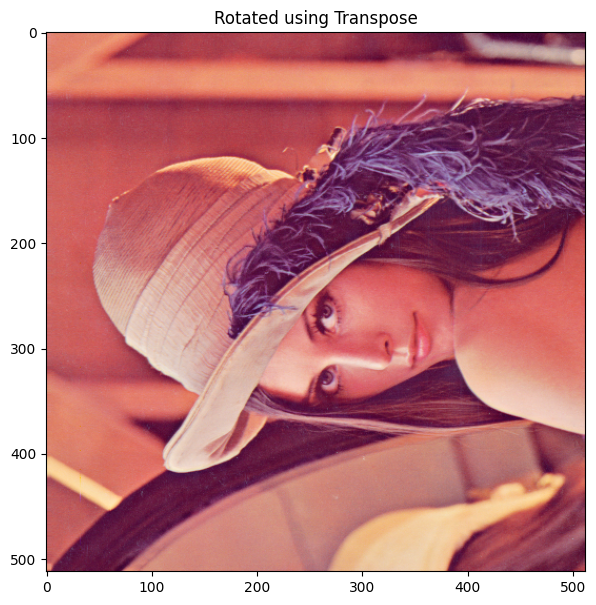

In [8]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

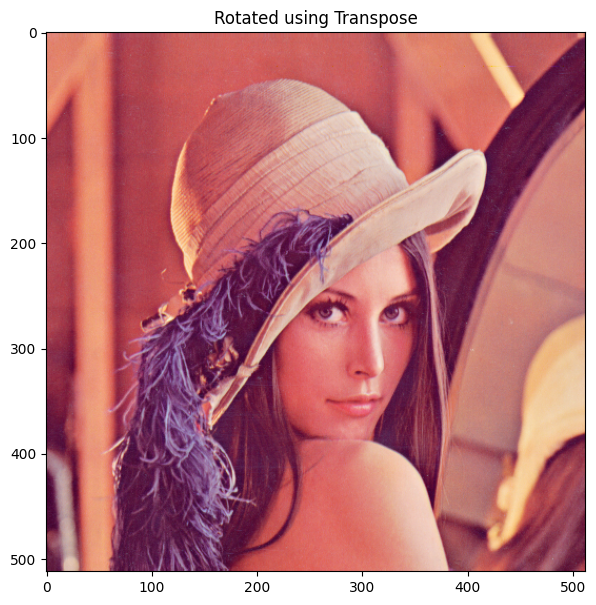

In [9]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

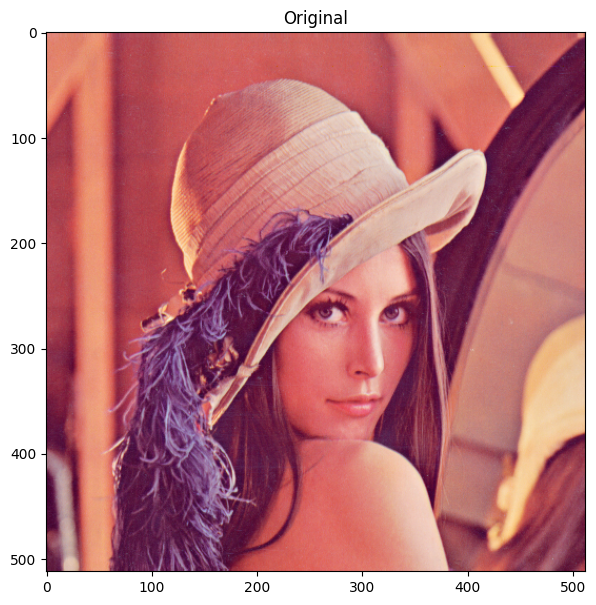

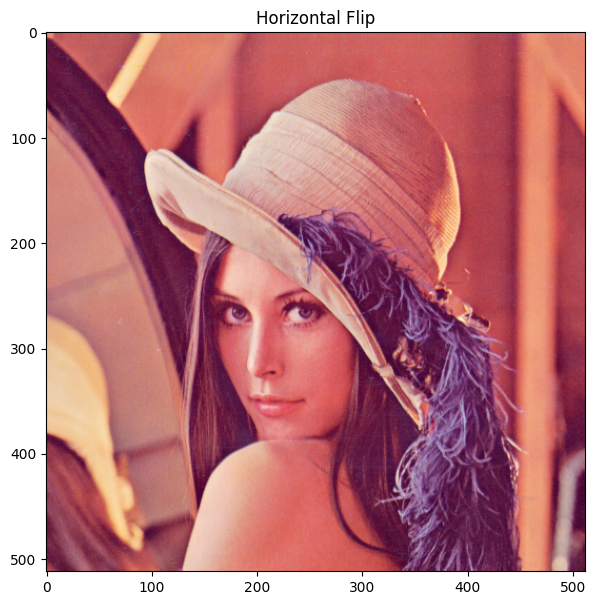

In [10]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Original", image)
imshow("Horizontal Flip", flipped)